In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython import display

import time

import seaborn as sns
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn import linear_model
import sklearn.datasets as toy_datasets
# import yfinance as yf

### Definitions
$$\rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y}$$
$$cov(X,Y) = \mathbb{E}[(X-\mu_X)(Y-\mu_Y)]$$
$$\mu_X = \text{Mean of } X$$
$$\mu_X = \text{Mean of } Y$$
$$\sigma_X = \text{Standard deviation of } X$$
$$\sigma_X = \text{Standard deviation of } Y$$

### Estimator
$$ r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x}_i)^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y}_i)^2}} $$

<IPython.core.display.Javascript object>


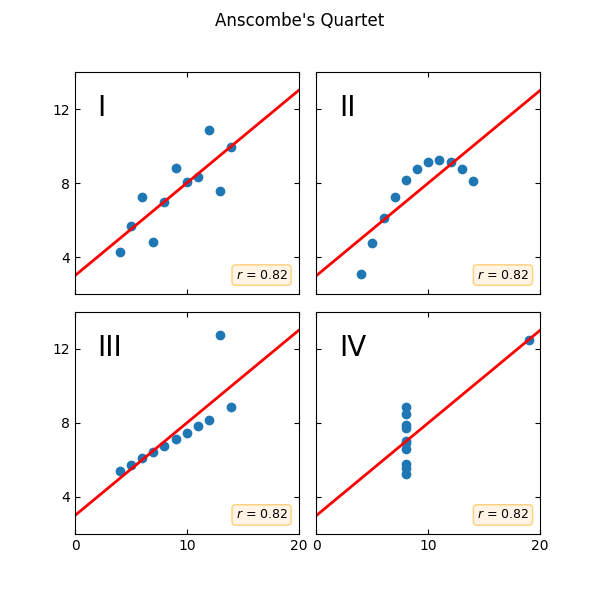

/tmp/ipykernel_21167/237184752.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [21]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
#     stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
#              f'$\\sigma$ = {np.std(y):.2f}\n'
#              f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    stats = (f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.suptitle('Anscombe\'s Quartet')
plt.tight_layout()

<IPython.core.display.Javascript object>


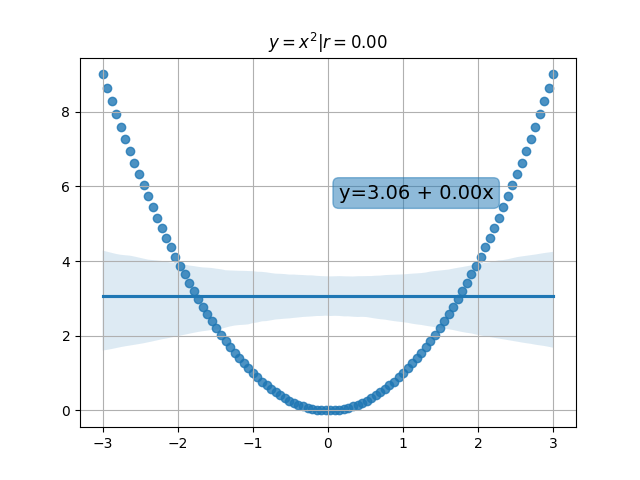

Text(0.1, 0.97, 'y=3.06 + 0.00x')

In [35]:
x = np.linspace(-3, 3, 100)
y = np.power(x, 2)

plt.figure()
r = np.corrcoef(x,y)
plt.title('$y = x^2 | r=%0.02f$' % (r[0][1],))
plt.grid()
g = sns.regplot(x=x, y=y)

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y=%0.02f + %0.02fx' % (regr.intercept_, regr.coef_[0])
g.text(0.1, 0.97, textstr, transform=ax.transAxes, fontsize=14, bbox=props)

<IPython.core.display.Javascript object>


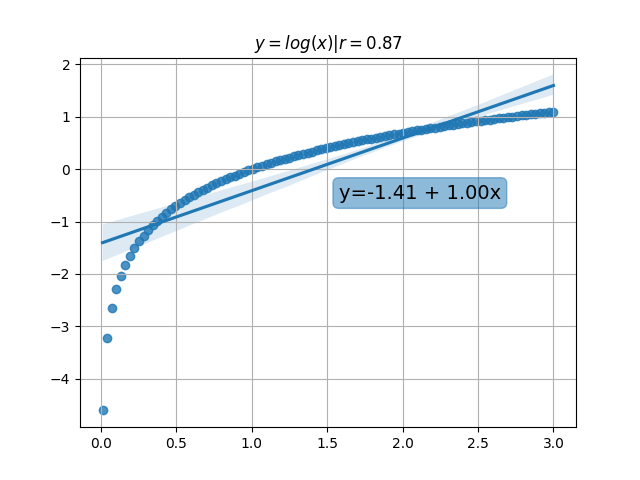

Text(0.1, 0.97, 'y=-1.41 + 1.00x')

In [36]:
x = np.linspace(0.01, 3, 100)
y = np.log(x)

plt.figure()
r = np.corrcoef(x,y)
plt.title('$y = log(x) | r=%0.02f$' % (r[0][1],))
plt.grid()
g = sns.regplot(x=x, y=y)

regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1,1), y.reshape(-1,1))
props = dict(boxstyle='round', alpha=0.5,color=sns.color_palette()[0])
textstr = 'y=%0.02f + %0.02fx' % (regr.intercept_, regr.coef_[0])
g.text(0.1, 0.97, textstr, transform=ax.transAxes, fontsize=14, bbox=props)

### Relationship between Regression and Correlation

$$Y_i=\alpha + \beta X_i + \epsilon_i$$
$$\hat{\beta} = r_{xy} \frac{\sigma_y}{\sigma_x} $$